In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('database.csv')

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [5]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [6]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Azimuthal Gap: largest distance between stations recording a quake; US Geological Survey

### The Root Mean Square in Seismic Attribute
The Root Mean Square (RMS), or quadratic mean, is a popular statistical measure of the magnitude of variation over a dataset. The RMS proves particularly useful when values run through the positive and negative domain like in sinusoids or seismic traces. The RMS attribute thus emphasizes the variations in acoustic impedance over a selected sample interval. Generally the higher the acoustic impedance variation of stacked lithologies (with bed thicknesses above the seismic resolution) the higher the RMS values will be. For example, a high RMS in a channel results from either a high acoustic impedance contrast of channel fill with the surrounding lithology or acoustic impedance contrasts within the infill.

## Data Cleaning

### Handling missing values

First, we need to know how many missing values are in this dataset.

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [9]:
df.shape

(23412, 21)

In [10]:
# columns * row.
total_cells = np.product(df.shape)

# sum all missing values.
total_missing = missing_values_count.sum()

In [11]:
total_cells

491652

In [12]:
total_missing

145439

In [13]:
# get missing value percentage.
(total_missing / total_cells) * 100

29.581695996355144

In [14]:
# get missing value percentage of 'Magnitude Error' column
(df['Magnitude Error'].isnull().sum() / df.shape[0]) * 100

98.60328036904151

Almost 30% of cells in this dataset are empty & 98% record of column `Magnitude Error` is NaN

### Figure out why the data is missing
```Is this value missing becuase it wasn't recorded or becuase it dosen't exist?```

If a value is missing becuase it doens't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probalby do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row.

In [15]:
missing_values_count

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

#### Record NaN pada kolom jika jumlah lebih dari 50%. dapat diasumsikan bahwa value kolom pada record tersebut memang tidak ada atau NaN

### Magnitude Types
https://earthquake.usgs.gov/learn/topics/mag-intensity/magnitude-types.php

In [16]:
df['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

In [17]:
df = df.dropna(subset=['Magnitude Type'])
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18948
Depth Seismic Stations        16312
Magnitude                         0
Magnitude Type                    0
Magnitude Error               23082
Magnitude Seismic Stations    20845
Azimuthal Gap                 16110
Horizontal Distance           21805
Horizontal Error              22253
Root Mean Square               6057
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

Kolom `Root Mean Square` memiliki total NaN 6057 record yang bisa diasumsikan bahwa data tersebut tidak terecord.

Terdapat beberapa method untuk mengatasinya: 
- Drop record.
- Average, Isi dengan rata-rata.
- bfill, mengisi dengan value record setelahnya, dll

In [18]:
temp_df = df.dropna(subset=['Root Mean Square'])
temp_df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   12891
Depth Seismic Stations        10434
Magnitude                         0
Magnitude Type                    0
Magnitude Error               17025
Magnitude Seismic Stations    14818
Azimuthal Gap                 10213
Horizontal Distance           15748
Horizontal Error              16196
Root Mean Square                  0
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [19]:
# fill root mean square nan value with average
df['Root Mean Square'].fillna(df['Root Mean Square'].mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_1544\2529989554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Root Mean Square'].fillna(df['Root Mean Square'].mean(), inplace=True)


In [20]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18948
Depth Seismic Stations        16312
Magnitude                         0
Magnitude Type                    0
Magnitude Error               23082
Magnitude Seismic Stations    20845
Azimuthal Gap                 16110
Horizontal Distance           21805
Horizontal Error              22253
Root Mean Square                  0
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [21]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [22]:
df.shape

(23409, 21)

### Dimensionality Reduction
https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456

<Axes: xlabel='Magnitude Error', ylabel='index'>

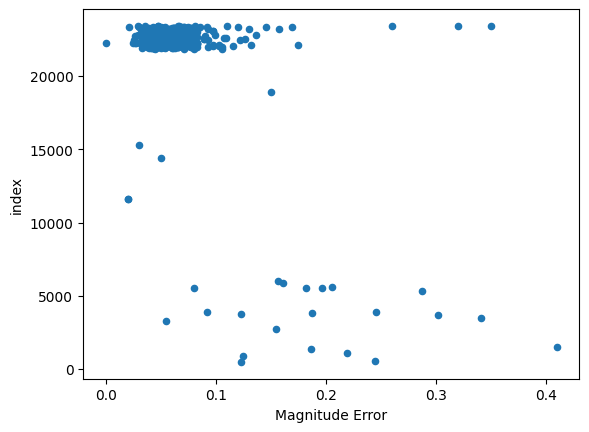

In [23]:
df.reset_index().plot(kind='scatter', x='Magnitude Error', y='index')

missing value percentage of

Depth Error: 80.94322696398821%
Depth Seismic Stations: 69.68260070912898%
Magnitude Error: 98.60310137126747%
Magnitude Seismic Stations: 89.04694775513691%
Azimuthal Gap: 68.81968473663976%
Horizontal Distance: 93.14793455508566%
Horizontal Error: 95.06172839506173%


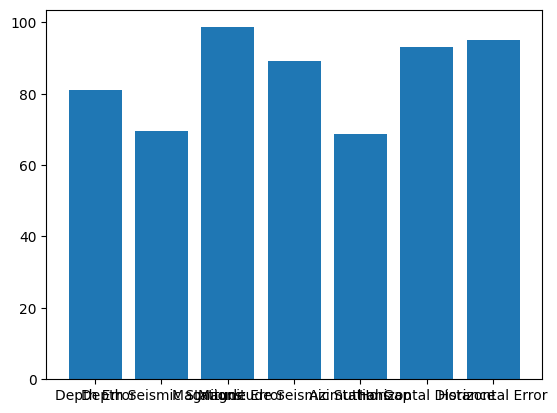

In [24]:
print("missing value percentage of\n")

columns     = []
percentages = []
for column in df.columns:
    percentage = (df[column].isnull().sum() / df.shape[0]) * 100
    if percentage > 30:
        print("{}: {}%".format(column, percentage))
        columns.append(column)
        percentages.append(percentage)

plt.bar(x=columns, height=percentages)
plt.show()

### Should we drop column with ~50% missing values percentage ?  
it’s totally depends upon the importance of the variable.
then. does the variable important ? 

In [25]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [26]:
list_of_columns = ['Depth Error', 'Depth Seismic Stations', 
                  'Magnitude Error', 'Magnitude Seismic Stations', 
                  'Azimuthal Gap', 'Horizontal Distance', 
                  'Horizontal Error']
df_dropped_NaN = df.drop(list_of_columns, 1)
df_dropped_NaN.head()

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
df_dropped_NaN.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [ ]:
df_dropped_NaN.nunique()

Date                12401
Time                20469
Latitude            20673
Longitude           21471
Type                    4
Depth                3483
Magnitude              64
Magnitude Type         10
Root Mean Square      191
ID                  23409
Source                 12
Location Source        47
Magnitude Source       23
Status                  2
dtype: int64

In [ ]:
df_dropped_NaN.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

## Remove Type except Earthquake.
We only use earthquake data

In [ ]:
df_dropped_NaN = df_dropped_NaN[df_dropped_NaN.Type == 'Earthquake']
df_dropped_NaN = df_dropped_NaN.drop('Type', 1)
df_dropped_NaN.nunique()

Date                12339
Time                20348
Latitude            20531
Longitude           21309
Depth                3480
Magnitude              59
Magnitude Type         10
Root Mean Square      188
ID                  23229
Source                 12
Location Source        47
Magnitude Source       23
Status                  2
dtype: int64

## Feature Selection

In [ ]:
df_dropped_NaN = df_dropped_NaN.drop('ID', 1)

In [ ]:
df_dropped_NaN.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
df_dropped_NaN.tail()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6,ML,0.1898,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5,ML,0.2187,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9,MWW,1.5200,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3,MWW,1.4300,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,11.94,5.5,MB,0.9100,US,US,US,Reviewed


In [ ]:
df_dropped_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23229 entries, 0 to 23411
Data columns (total 12 columns):
Date                23229 non-null object
Time                23229 non-null object
Latitude            23229 non-null float64
Longitude           23229 non-null float64
Depth               23229 non-null float64
Magnitude           23229 non-null float64
Magnitude Type      23229 non-null object
Root Mean Square    23229 non-null float64
Source              23229 non-null object
Location Source     23229 non-null object
Magnitude Source    23229 non-null object
Status              23229 non-null object
dtypes: float64(5), object(7)
memory usage: 2.3+ MB


## Normalize numerical data

In [ ]:
numerical_columns = ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Root Mean Square']

scaler = MinMaxScaler()

for column in numerical_columns:
    if column != 'Magnitude':
        scaled_values = scaler.fit_transform(df_dropped_NaN[column].values.reshape(-1, 1))
        df_dropped_NaN.drop(column, 1)
        df_dropped_NaN[column] = scaled_values
    
df_dropped_NaN.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,0.189274,6.0,MW,0.317635,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,0.115675,5.8,MW,0.317635,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,0.030096,6.2,MW,0.317635,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,0.022964,5.8,MW,0.317635,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,0.022964,5.8,MW,0.317635,ISCGEM,ISCGEM,ISCGEM,Automatic


## Encode categorical data to numeric

In [ ]:
categorical_columns = ['Source', 'Magnitude Type', 'Location Source', 'Magnitude Source', 'Status']

encoder = LabelEncoder()

for column in categorical_columns:
    encoded_values = encoder.fit_transform(df_dropped_NaN[column])
    column_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(column_mapping)
    df_dropped_NaN[column] = encoded_values

df_dropped_NaN.head()

{'AK': 0, 'CI': 1, 'GCMT': 2, 'ISCGEM': 3, 'ISCGEMSUP': 4, 'NC': 5, 'NN': 6, 'OFFICIAL': 7, 'PR': 8, 'SE': 9, 'US': 10, 'UW': 11}
{'MB': 0, 'MD': 1, 'MH': 2, 'ML': 3, 'MS': 4, 'MW': 5, 'MWB': 6, 'MWC': 7, 'MWR': 8, 'MWW': 9}
{'AEI': 0, 'AEIC': 1, 'AG': 2, 'AGS': 3, 'AK': 4, 'ATH': 5, 'B': 6, 'BEO': 7, 'BOU': 8, 'BRK': 9, 'CAR': 10, 'CASC': 11, 'CI': 12, 'CSEM': 13, 'G': 14, 'GCMT': 15, 'GUC': 16, 'H': 17, 'HVO': 18, 'ISCGEM': 19, 'ISK': 20, 'JMA': 21, 'LIM': 22, 'MDD': 23, 'NC': 24, 'NN': 25, 'OTT': 26, 'PGC': 27, 'PR': 28, 'ROM': 29, 'RSPR': 30, 'SE': 31, 'SJA': 32, 'SLC': 33, 'SPE': 34, 'TAP': 35, 'TEH': 36, 'THE': 37, 'THR': 38, 'TUL': 39, 'U': 40, 'UCR': 41, 'UNM': 42, 'US': 43, 'US_WEL': 44, 'UW': 45, 'WEL': 46}
{'1000': 0, '1009': 1, '1020': 2, '1023': 3, 'AK': 4, 'BRK': 5, 'CI': 6, 'GCMT': 7, 'GUC': 8, 'HRV': 9, 'ISCGEM': 10, 'NC': 11, 'NIED': 12, 'NN': 13, 'OFFICIAL': 14, 'PAR': 15, 'PGC': 16, 'PR': 17, 'SE': 18, 'US': 19, 'US_GCMT': 20, 'US_PGC': 21, 'UW': 22}
{'Automatic': 0,

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,0.189274,6.0,5,0.317635,3,19,10,0
1,01/04/1965,11:29:49,1.863,127.352,0.115675,5.8,5,0.317635,3,19,10,0
2,01/05/1965,18:05:58,-20.579,-173.972,0.030096,6.2,5,0.317635,3,19,10,0
3,01/08/1965,18:49:43,-59.076,-23.557,0.022964,5.8,5,0.317635,3,19,10,0
4,01/09/1965,13:32:50,11.938,126.427,0.022964,5.8,5,0.317635,3,19,10,0


In [ ]:
print(df_dropped_NaN[df_dropped_NaN.Magnitude < 5.8].count())
print(df_dropped_NaN[df_dropped_NaN.Magnitude >= 5.8].count())

Date                11685
Time                11685
Latitude            11685
Longitude           11685
Depth               11685
Magnitude           11685
Magnitude Type      11685
Root Mean Square    11685
Source              11685
Location Source     11685
Magnitude Source    11685
Status              11685
dtype: int64
Date                11544
Time                11544
Latitude            11544
Longitude           11544
Depth               11544
Magnitude           11544
Magnitude Type      11544
Root Mean Square    11544
Source              11544
Location Source     11544
Magnitude Source    11544
Status              11544
dtype: int64


In [ ]:
df_dropped_NaN['Magnitude Discrete'] = pd.cut(df_dropped_NaN.Magnitude, [0, 5.8, 10], labels=['Medium', 'Big'] , include_lowest=True)
df_dropped_NaN.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude Discrete
0,01/02/1965,13:44:18,19.246,145.616,0.189274,6.0,5,0.317635,3,19,10,0,Big
1,01/04/1965,11:29:49,1.863,127.352,0.115675,5.8,5,0.317635,3,19,10,0,Medium
2,01/05/1965,18:05:58,-20.579,-173.972,0.030096,6.2,5,0.317635,3,19,10,0,Big
3,01/08/1965,18:49:43,-59.076,-23.557,0.022964,5.8,5,0.317635,3,19,10,0,Medium
4,01/09/1965,13:32:50,11.938,126.427,0.022964,5.8,5,0.317635,3,19,10,0,Medium


## Save discrete (target) dataset to csv.

In [ ]:
drop_columns_final = ['Magnitude', 'Status']

final_df = df_dropped_NaN.drop(drop_columns_final, 1)
final_df.to_csv('final_discrete.csv')

In [ ]:
df_dropped_NaN.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude Discrete
0,01/02/1965,13:44:18,19.246,145.616,0.189274,6.0,5,0.317635,3,19,10,0,Big
1,01/04/1965,11:29:49,1.863,127.352,0.115675,5.8,5,0.317635,3,19,10,0,Medium
2,01/05/1965,18:05:58,-20.579,-173.972,0.030096,6.2,5,0.317635,3,19,10,0,Big
3,01/08/1965,18:49:43,-59.076,-23.557,0.022964,5.8,5,0.317635,3,19,10,0,Medium
4,01/09/1965,13:32:50,11.938,126.427,0.022964,5.8,5,0.317635,3,19,10,0,Medium


## Save numeric (target) dataset to csv.

In [ ]:
drop_columns_final = ['Status', 'Magnitude Discrete']

final_df = df_dropped_NaN.drop(drop_columns_final, 1)
final_df.to_csv('final_numeric.csv')

### Parse date time
Fail

In [ ]:
# date_timestamp = []
# for index, rows in df_dropped_NaN.head().iterrows():
#     rowsdt = "{} {}".format(rows.Date, rows.Time[:5])
#     try:
#         dt = datetime.datetime.strptime(rowsdt, '%m/%d/%Y %H:%M')
#         date_timestamp.append(date_timestamp)
#     except Exception as e:
#         rowsdt = "{} {}".format(rows.Date[:10], rows.Time[11:16])
#         dt = datetime.datetime.strptime(rowsdt, '%Y-%m-%d %H:%M')
#         date_timestamp.append(date_timestamp)
# print(date_timestamp)
# df_dropped_NaN.append({"Timestamp" : date_timestamp}, ignore_index=True)

In [ ]:
# df_dropped_NaN.head()